In [78]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import seaborn
import time
import numpy as np

from cuckoofilter import CuckooFilter
from cuckoofilter import CountingBloomFilter

In [51]:
#initialize a cuckoo and bloom filter
b_filter = CountingBloomFilter(cpty)

In [54]:
def insert_and_time_filter_cuckoo_filter(capacity, percent_fill=0.9):
    num_inserted = 0
    c_filter = CuckooFilter(capacity, 2)
    now = time.time()
    for i in range(int(percent_fill*capacity)):
        try:
            c_filter.insert(str(i))
            num_inserted += 1
        except:
            break
    elapsed = time.time() - now
    return elapsed

In [68]:
insert_and_time_filter_cuckoo_filter(10000)

0.08478212356567383

In [65]:
def insert_and_time_filter_bloom_filter(capacity, percent_fill=0.9):
    num_inserted = 0
    b_filter = CountingBloomFilter(capacity)
    now = time.time()
    for i in range(int(percent_fill*capacity)):
        b_filter.add(str(i))
    elapsed = time.time() - now
    return elapsed

In [69]:
insert_and_time_filter_bloom_filter(10000)

0.6806850433349609

In [71]:
item_sizes = [10000, 100000, 1000000]
bloom_times = []
cuckoo_times = []

In [73]:
for size in item_sizes:
    bloom_times.append(insert_and_time_filter_bloom_filter(size))
    cuckoo_times.append(insert_and_time_filter_cuckoo_filter(size))

(-40, 1000)

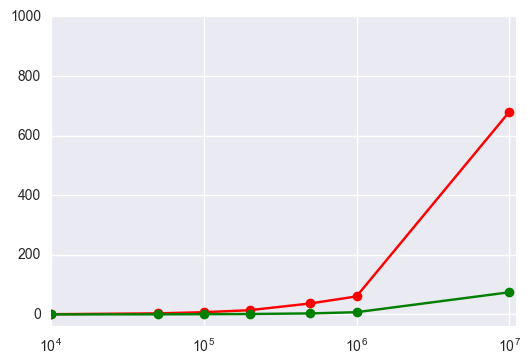

In [99]:
plt.semilogx(np.array(item_sizes), np.array(bloom_times), "-ro", ms=7, label="Counting bloom filter")
plt.semilogx(np.array(item_sizes), np.array(cuckoo_times), "-go", ms=7, label="Cuckoo filter")
plt.xlim([0, 11000000])
plt.ylim([-40, 1000])
plt.title()

In [80]:
bloom_times

[0.742671012878418,
 3.5515940189361572,
 7.433334112167358,
 14.224809885025024,
 36.90250611305237,
 60.467159032821655,
 680.0932171344757]

In [81]:
cuckoo_times

[0.07932496070861816,
 0.36794590950012207,
 0.8638038635253906,
 1.4781010150909424,
 3.4258201122283936,
 7.467651844024658,
 74.33099508285522]

In [82]:
item_sizes

[10000, 50000, 100000, 200000, 500000, 1000000, 10000000]